### Import Libraries

In [151]:
import pandas as pd
from IPython.display import display, display_html, Image, HTML
import numpy as np
import matplotlib.pyplot as plt

### Set Options

In [244]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)
plt.rc('figure', figsize=(14, 7))

### Helper Methods

In [245]:
def convert_to_http(path):
    if (path[4] == 's'):
        return path[:4] + path[5:]
    else:
        return path

In [246]:
print(convert_to_http("https://cdn.sofifa.com/players/158/023/20_60.png"))
print(convert_to_http("http://cdn.sofifa.com/players/153/033/20_60.png"))

http://cdn.sofifa.com/players/158/023/20_60.png
http://cdn.sofifa.com/players/153/033/20_60.png


In [247]:
def convert_to_html_image(path):
    return '<img src="' + path + '"/>'

In [248]:
print(convert_to_html_image("http://cdn.sofifa.com/players/153/033/20_60.png"))

<img src="http://cdn.sofifa.com/players/153/033/20_60.png"/>


### Load Data

Load FIFA 2020 Data and sort Descending by Overall:

In [249]:
original_player_data = pd.read_csv("../DataSource/FIFA20_Official_Data.csv").sort_values(by=['Best Overall Rating'], ascending=False).reset_index(drop=True)

In [250]:
original_player_data['Photo'] = original_player_data['Photo'].map(lambda path: convert_to_http(path))
original_player_data['Flag'] = original_player_data['Flag'].map(lambda path: convert_to_http(path))
original_player_data['Club Logo'] = original_player_data['Club Logo'].map(lambda path: convert_to_http(path))

In [251]:
original_player_data['Club Logo'] = original_player_data['Club Logo'].map(lambda path: convert_to_html_image(path))

In [252]:
original_player_data.head(10)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,158023,L. Messi,32,http://cdn.sofifa.com/players/158/023/20_60.png,Argentina,http://cdn.sofifa.com/flags/ar.png,94,94,FC Barcelona,"<img src=""http://cdn.sofifa.com/teams/241/light_30.png""/>",€95.5M,€560K,2255,Left,5.0,4.0,4.0,Medium/ Low,Messi,Yes,"<span class=""pos pos23"">RW",10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88.0,95.0,70.0,92.0,88.0,97.0,93.0,94.0,92.0,96.0,91.0,84.0,93.0,95.0,95.0,86.0,68.0,75.0,68.0,94.0,48.0,40.0,94.0,94.0,75.0,96.0,NaN,37.0,26.0,6.0,11.0,15.0,14.0,8.0,RW,94.0,€195.8M,33.0
1,20801,Cristiano Ronaldo,34,http://cdn.sofifa.com/players/020/801/20_60.png,Portugal,http://cdn.sofifa.com/flags/pt.png,93,93,Juventus,"<img src=""http://cdn.sofifa.com/teams/45/light_30.png""/>",€58.5M,€410K,2227,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,"<span class=""pos pos26"">LS",7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,84.0,94.0,89.0,83.0,87.0,89.0,81.0,76.0,77.0,92.0,88.0,91.0,87.0,96.0,71.0,95.0,95.0,85.0,78.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,NaN,32.0,24.0,7.0,11.0,15.0,14.0,11.0,ST,93.0,€96.5M,28.0
2,190871,Neymar Jr,27,http://cdn.sofifa.com/players/190/871/20_60.png,Brazil,http://cdn.sofifa.com/flags/br.png,92,92,Paris Saint-Germain,"<img src=""http://cdn.sofifa.com/teams/73/light_30.png""/>",€105.5M,€290K,2179,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,"<span class=""pos pos27"">LW",10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,87.0,87.0,62.0,87.0,87.0,96.0,88.0,89.0,81.0,95.0,94.0,89.0,96.0,92.0,84.0,80.0,61.0,81.0,49.0,85.0,51.0,36.0,87.0,90.0,92.0,94.0,NaN,30.0,29.0,9.0,9.0,15.0,15.0,11.0,LW,92.0,€195.2M,35.0
3,183277,E. Hazard,28,http://cdn.sofifa.com/players/183/277/20_60.png,Belgium,http://cdn.sofifa.com/flags/be.png,91,91,Real Madrid,"<img src=""http://cdn.sofifa.com/teams/243/light_30.png""/>",€90M,€470K,2145,Right,4.0,4.0,4.0,High/ Medium,Normal (170-185),Yes,"<span class=""pos pos28"">SUB",7.0,"Jul 1, 2019",NaN,2024,5'9,163lbs,81.0,84.0,61.0,89.0,83.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,84.0,63.0,80.0,54.0,41.0,87.0,89.0,88.0,91.0,NaN,27.0,22.0,11.0,12.0,6.0,8.0,8.0,LW,91.0,€184.5M,34.0
4,192985,K. De Bruyne,28,http://cdn.sofifa.com/players/192/985/20_60.png,Belgium,http://cdn.sofifa.com/flags/be.png,91,91,Manchester City,"<img src=""http://cdn.sofifa.com/teams/10/light_30.png""/>",€90M,€370K,2289,Right,4.0,5.0,4.0,High/ High,Normal (170-185),Yes,"<span class=""pos pos13"">RCM",17.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,94.0,82.0,55.0,92.0,82.0,87.0,85.0,83.0,91.0,91.0,77.0,76.0,78.0,91.0,76.0,91.0,63.0,89.0,74.0,90.0,76.0,63.0,88.0,94.0,82.0,91.0,NaN,62.0,53.0,15.0,13.0,5.0,10.0,13.0,CAM,91.0,€166.5M,68.0
5,203376,V. van Dijk,27,http://cdn.sofifa.com/players/203/376/20_60.png,Netherlands,http://cdn.sofifa.com/flags/nl.png,91,92,Liverpool,"<img src=""http://cdn.sofifa.com/teams/9/light_30.png""/>",€90M,€240K,2111,Right,3.0,3.0,2.0,Medium/ Medium,Normal (185+),Yes,"<span class=""pos pos6"">LCB",4.0,"Jan 1, 2018",NaN,2023,6'4,203lbs,53.0,52.0,87.0,79.0,45.0,70.0,60.0,70.0,83.0,77.0,74.0,79.0,61.0,89.0,53.0,81.0,90.0,75.0,92.0,64.0,83.0,90.0,47.0,65.0,62.0,90.0,NaN,93.0,86.0,13.0,10.0,13.0,11.0,11.0,CB,91.0,€173.3M,93.0
6,188545,R. Lewandowski,30,http://cdn.sofifa.com/players/188/545/20_60.png,Poland,http://cdn.sofifa.com/flags/pl.png,91,91,FC Bayern München,"<img src=""http://cdn.sofifa.com/teams/21/light_30.png""/>",€86

Get List of Clubs (Sort and Reset Index): 

In [253]:
list_of_clubs = pd.DataFrame({'Club': original_player_data["Club"].unique()}).sort_values(by=['Club']).reset_index(drop=True)

In [254]:
list_of_players = pd.DataFrame({'ID': original_player_data["ID"], 'Name': original_player_data["Name"]}).sort_values(by=['Name']).reset_index(drop=True)

In [255]:
def get_club_list(start_index = None, end_index = None):
    return list_of_clubs[start_index : end_index]

In [256]:
def get_player_list(start_index = None, end_index = None):
    return list_of_players[start_index : end_index]

In [257]:
get_club_list(5, 8)

,Club
5,1. FC Union Berlin
6,1. FSV Mainz 05
7,111648


In [258]:
get_player_list(end_index=6)

,ID,Name
0,178453,07 A. Censori
1,163270,07 A. Ugalde
2,53566,07 E. Howe
3,144905,07 Yeray
4,10758,08 G. Mendieta
5,5740,08 J. Stam


In [259]:
def get_player_by_club(club_name):
    return original_player_data[original_player_data["Club"] == club_name]

In [260]:
get_player_by_club("Manchester United").head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
33,193080,De Gea,28,http://cdn.sofifa.com/players/193/080/20_60.png,Spain,http://cdn.sofifa.com/flags/es.png,88,88,Manchester United,"<img src=""http://cdn.sofifa.com/teams/11/light_30.png""/>",€43.5M,€195K,1462,Right,4.0,3.0,1.0,Medium/ Medium,Lean (185+),Yes,"<span class=""pos pos0"">GK",1.0,"Jul 1, 2011",NaN,2023,6'4,181lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,47.0,38.0,57.0,58.0,63.0,86.0,43.0,59.0,67.0,43.0,60.0,12.0,38.0,30.0,12.0,65.0,29.0,68.0,NaN,21.0,13.0,90.0,81.0,78.0,84.0,91.0,GK,88.0,€82.7M,25.0
47,212198,Bruno Fernandes,24,http://cdn.sofifa.com/players/212/198/20_60.png,Portugal,http://cdn.sofifa.com/flags/pt.png,86,89,Manchester United,"<img src=""http://cdn.sofifa.com/teams/11/light_30.png""/>",€56.5M,€165K,2299,Right,2.0,4.0,4.0,High/ High,Lean (170-185),No,"<span class=""pos pos18"">CAM",18.0,"Jan 30, 2020",NaN,2025,5'10,152lbs,87.0,77.0,58.0,86.0,86.0,85.0,86.0,87.0,87.0,87.0,79.0,77.0,80.0,84.0,79.0,89.0,72.0,94.0,67.0,89.0,70.0,74.0,83.0,88.0,90.0,86.0,NaN,68.0,55.0,12.0,14.0,15.0,8.0,14.0,CAM,87.0,€111.6M,72.0
53,195864,P. Pogba,26,http://cdn.sofifa.com/players/195/864/20_60.png,France,http://cdn.sofifa.com/flags/fr.png,87,88,Manchester United,"<img src=""http://cdn.sofifa.com/teams/11/light_30.png""/>",€58M,€210K,2238,Right,4.0,4.0,5.0,High/ Medium,Normal (185+),Yes,"<span class=""pos pos28"">SUB",6.0,"Aug 9, 2016",NaN,2021,6'3,185lbs,80.0,75.0,75.0,86.0,84.0,87.0,85.0,82.0,90.0,90.0,67.0,79.0,73.0,81.0,66.0,90.0,82.0,84.0,89.0,82.0,78.0,64.0,83.0,88.0,83.0,87.0,NaN,67.0,65.0,5.0,6.0,2.0,4.0,3.0,CM,87.0,€114.6M,63.0
139,231677,M. Rashford,21,http://cdn.sofifa.com/players/231/677/20_60.png,England,http://cdn.sofifa.com/flags/gb-eng.png,84,89,Manchester United,"<img src=""http://cdn.sofifa.com/teams/11/light_30.png""/>",€42M,€120K,2144,Right,2.0,3.0,5.0,High/ Medium,Lean (185+),Yes,"<span class=""pos pos28"">SUB",10.0,"Jul 1, 2014",NaN,2023,6'1,154lbs,75.0,83.0,72.0,77.0,76.0,86.0,82.0,76.0,67.0,84.0,89.0,94.0,86.0,85.0,75.0,90.0,72.0,87.0,76.0,81.0,73.0,42.0,84.0,79.0,80.0,80.0,NaN,40.0,33.0,11.0,6.0,15.0,7.0,14.0,RM,85.0,€83M,47.0
165,211300,A. Martial,23,http://cdn.sofifa.com/players/211/300/20_60.png,France,http://cdn.sofifa.com/flags/fr.png,83,87,Manchester United,"<img src=""http://cdn.sofifa.com/teams/11/light_30.png""/>",€34.5M,€140K,2051,Right,3.0,3.0,4.0,Medium/ Medium,Normal (170-185),Yes,"<span class=""pos pos25"">ST",9.0,"Sep 1, 2015",NaN,2024,6'0,168lbs,72.0,82.0,71.0,78.0,74.0,87.0,82.0,54.0,63.0,86.0,88.0,89.0,84.0,81.0,79.0,83.0,70.0,75.0,76.0,77.0,58.0,42.0,82.0,77.0,81.0,80.0,NaN,39.0,36.0,9.0,8.0,8.0,15.0,11.0,ST,84.0,€68.1M,34.0


In [261]:
def get_player_by_nationality(country_name):
    return original_player_data[original_player_data["Nationality"] == country_name]

In [262]:
get_player_by_nationality("Spain").head(10)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
16,155862,Sergio Ramos,33,http://cdn.sofifa.com/players/155/862/20_60.png,Spain,http://cdn.sofifa.com/flags/es.png,89,89,Real Madrid,"<img src=""http://cdn.sofifa.com/teams/243/light_30.png""/>",€31.5M,€300K,2232,Right,4.0,3.0,3.0,High/ Medium,Normal (170-185),Yes,"<span class=""pos pos6"">LCB",4.0,"Aug 1, 2005",NaN,2021,6'0,181lbs,66.0,63.0,92.0,80.0,69.0,65.0,74.0,72.0,83.0,83.0,74.0,71.0,78.0,87.0,66.0,79.0,93.0,80.0,85.0,62.0,90.0,88.0,67.0,71.0,86.0,84.0,NaN,87.0,90.0,11.0,8.0,9.0,7.0,11.0,CB,89.0,€64.6M,85.0
32,189511,Sergio Busquets,30,http://cdn.sofifa.com/players/189/511/20_60.png,Spain,http://cdn.sofifa.com/flags/es.png,88,88,FC Barcelona,"<img src=""http://cdn.sofifa.com/teams/241/light_30.png""/>",€49M,€280K,2035,Right,4.0,3.0,3.0,Medium/ Medium,Lean (185+),Yes,"<span class=""pos pos10"">CDM",5.0,"Sep 1, 2008",NaN,2023,6'2,168lbs,62.0,67.0,68.0,89.0,44.0,81.0,66.0,68.0,83.0,88.0,40.0,43.0,67.0,86.0,49.0,61.0,66.0,83.0,77.0,54.0,83.0,87.0,77.0,85.0,60.0,93.0,NaN,85.0,80.0,5.0,8.0,13.0,9.0,13.0,CDM,88.0,€100.5M,88.0
33,193080,De Gea,28,http://cdn.sofifa.com/players/193/080/20_60.png,Spain,http://cdn.sofifa.com/flags/es.png,88,88,Manchester United,"<img src=""http://cdn.sofifa.com/teams/11/light_30.png""/>",€43.5M,€195K,1462,Right,4.0,3.0,1.0,Medium/ Medium,Lean (185+),Yes,"<span class=""pos pos0"">GK",1.0,"Jul 1, 2011",NaN,2023,6'4,181lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,47.0,38.0,57.0,58.0,63.0,86.0,43.0,59.0,67.0,43.0,60.0,12.0,38.0,30.0,12.0,65.0,29.0,68.0,NaN,21.0,13.0,90.0,81.0,78.0,84.0,91.0,GK,88.0,€82.7M,25.0
37,152729,Piqué,32,http://cdn.sofifa.com/players/152/729/20_60.png,Spain,http://cdn.sofifa.com/flags/es.png,88,88,FC Barcelona,"<img src=""http://cdn.sofifa.com/teams/241/light_30.png""/>",€38M,€280K,2006,Right,4.0,3.0,2.0,High/ Medium,Normal (185+),Yes,"<span class=""pos pos4"">RCB",3.0,"Jul 1, 2008",NaN,2022,6'4,187lbs,57.0,65.0,85.0,83.0,57.0,63.0,58.0,43.0,81.0,82.0,49.0,66.0,57.0,85.0,36.0,62.0,75.0,70.0,87.0,51.0,80.0,89.0,64.0,72.0,69.0,87.0,NaN,87.0,86.0,10.0,11.0,14.0,15.0,8.0,CB,88.0,€77.9M,89.0
51,189513,Parejo,30,http://cdn.sofifa.com/players/189/513/20_60.png,Spain,http://cdn.sofifa.com/flags/es.png,87,87,Valencia CF,"<img src=""http://cdn.sofifa.com/teams/461/light_30.png""/>",€46.5M,€74K,2149,Right,2.0,4.0,3.0,Medium/ Medium,Lean (170-185),Yes,"<span class=""pos pos13"">RCM",10.0,"Jul 1, 2011",NaN,2022,6'0,163lbs,87.0,82.0,61.0,91.0,72.0,81.0,89.0,91.0,88.0,86.0,49.0,35.0,64.0,80.0,75.0,81.0,49.0,81.0,71.0,85.0,58.0,80.0,82.0,86.0,88.0,85.0,NaN,72.0,69.0,5.0,9.0,12.0,14.0,8.0,CM,87.0,€97.7M,68.0
57,168542,David Silva,33,http://cdn.sofifa.com/players/168/542/20_60.png,Spain,http://cdn.sofifa.com/flags/es.png,87,87,Manchester City,"<img src=""http://cdn.sofifa.com/teams/10/light_30.png""/>",€30.5M,€220K,2062,Left,4.0,2.0,4.0,High/ Medium,Normal (170-185),Yes,"<span class=""pos pos15"">LCM",21.0,"Jul 14, 2010",NaN,2020,5'8,148lbs,84.0,72.0,53.0,92.0,82.0,86.0,82.0,77.0,84.0,91.0,68.0,61.0,85.0,87.0,87.0,72.0,64.0,70.0,48.0,73.0,56.0,50.0,86.0,91.0,75.0,92.0,NaN,53.0,29.0,6.0,15.0,7.0,6.0,12.0,CAM,87.0,€56.4M,58.0
90,193747,Koke,27,http://cdn.sofifa.com/players/193/747/20_60.png,Spain,http://cdn.sofifa.com/flags/es.png,86,86,Atlético Madrid,"<img src=""http://cdn.sofifa.com/teams/240/light_30.png""/>",€45.5M,€96K,22

In [263]:
def get_player_by_overall(min_value, max_value = 100):
    return original_player_data[(original_player_data["Overall"] >= min_value) & (original_player_data["Overall"] <= max_value)]

In [264]:
get_player_by_overall(min_value=90, max_value=100)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,158023,L. Messi,32,http://cdn.sofifa.com/players/158/023/20_60.png,Argentina,http://cdn.sofifa.com/flags/ar.png,94,94,FC Barcelona,"<img src=""http://cdn.sofifa.com/teams/241/light_30.png""/>",€95.5M,€560K,2255,Left,5.0,4.0,4.0,Medium/ Low,Messi,Yes,"<span class=""pos pos23"">RW",10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88.0,95.0,70.0,92.0,88.0,97.0,93.0,94.0,92.0,96.0,91.0,84.0,93.0,95.0,95.0,86.0,68.0,75.0,68.0,94.0,48.0,40.0,94.0,94.0,75.0,96.0,NaN,37.0,26.0,6.0,11.0,15.0,14.0,8.0,RW,94.0,€195.8M,33.0
1,20801,Cristiano Ronaldo,34,http://cdn.sofifa.com/players/020/801/20_60.png,Portugal,http://cdn.sofifa.com/flags/pt.png,93,93,Juventus,"<img src=""http://cdn.sofifa.com/teams/45/light_30.png""/>",€58.5M,€410K,2227,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,"<span class=""pos pos26"">LS",7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,84.0,94.0,89.0,83.0,87.0,89.0,81.0,76.0,77.0,92.0,88.0,91.0,87.0,96.0,71.0,95.0,95.0,85.0,78.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,NaN,32.0,24.0,7.0,11.0,15.0,14.0,11.0,ST,93.0,€96.5M,28.0
2,190871,Neymar Jr,27,http://cdn.sofifa.com/players/190/871/20_60.png,Brazil,http://cdn.sofifa.com/flags/br.png,92,92,Paris Saint-Germain,"<img src=""http://cdn.sofifa.com/teams/73/light_30.png""/>",€105.5M,€290K,2179,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,"<span class=""pos pos27"">LW",10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,87.0,87.0,62.0,87.0,87.0,96.0,88.0,89.0,81.0,95.0,94.0,89.0,96.0,92.0,84.0,80.0,61.0,81.0,49.0,85.0,51.0,36.0,87.0,90.0,92.0,94.0,NaN,30.0,29.0,9.0,9.0,15.0,15.0,11.0,LW,92.0,€195.2M,35.0
3,183277,E. Hazard,28,http://cdn.sofifa.com/players/183/277/20_60.png,Belgium,http://cdn.sofifa.com/flags/be.png,91,91,Real Madrid,"<img src=""http://cdn.sofifa.com/teams/243/light_30.png""/>",€90M,€470K,2145,Right,4.0,4.0,4.0,High/ Medium,Normal (170-185),Yes,"<span class=""pos pos28"">SUB",7.0,"Jul 1, 2019",NaN,2024,5'9,163lbs,81.0,84.0,61.0,89.0,83.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,84.0,63.0,80.0,54.0,41.0,87.0,89.0,88.0,91.0,NaN,27.0,22.0,11.0,12.0,6.0,8.0,8.0,LW,91.0,€184.5M,34.0
4,192985,K. De Bruyne,28,http://cdn.sofifa.com/players/192/985/20_60.png,Belgium,http://cdn.sofifa.com/flags/be.png,91,91,Manchester City,"<img src=""http://cdn.sofifa.com/teams/10/light_30.png""/>",€90M,€370K,2289,Right,4.0,5.0,4.0,High/ High,Normal (170-185),Yes,"<span class=""pos pos13"">RCM",17.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,94.0,82.0,55.0,92.0,82.0,87.0,85.0,83.0,91.0,91.0,77.0,76.0,78.0,91.0,76.0,91.0,63.0,89.0,74.0,90.0,76.0,63.0,88.0,94.0,82.0,91.0,NaN,62.0,53.0,15.0,13.0,5.0,10.0,13.0,CAM,91.0,€166.5M,68.0
5,203376,V. van Dijk,27,http://cdn.sofifa.com/players/203/376/20_60.png,Netherlands,http://cdn.sofifa.com/flags/nl.png,91,92,Liverpool,"<img src=""http://cdn.sofifa.com/teams/9/light_30.png""/>",€90M,€240K,2111,Right,3.0,3.0,2.0,Medium/ Medium,Normal (185+),Yes,"<span class=""pos pos6"">LCB",4.0,"Jan 1, 2018",NaN,2023,6'4,203lbs,53.0,52.0,87.0,79.0,45.0,70.0,60.0,70.0,83.0,77.0,74.0,79.0,61.0,89.0,53.0,81.0,90.0,75.0,92.0,64.0,83.0,90.0,47.0,65.0,62.0,90.0,NaN,93.0,86.0,13.0,10.0,13.0,11.0,11.0,CB,91.0,€173.3M,93.0
6,188545,R. Lewandowski,30,http://cdn.sofifa.com/players/188/545/20_60.png,Poland,http://cdn.sofifa.com/flags/pl.png,91,91,FC Bayern München,"<img src=""http://cdn.sofifa.com/teams/21/light_30.png""/>",€86

In [265]:
def get_player_by_potential(min_value, max_value = 100):
    return original_player_data[(original_player_data["Potential"] >= min_value) & (original_player_data["Potential"] <= max_value)]

In [266]:
get_player_by_potential(95)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
13,231747,K. Mbappé,20,http://cdn.sofifa.com/players/231/747/20_60.png,France,http://cdn.sofifa.com/flags/fr.png,89,95,Paris Saint-Germain,"<img src=""http://cdn.sofifa.com/teams/73/light_30.png""/>",€93.5M,€150K,2137,Right,3.0,4.0,5.0,High/ Low,Normal (170-185),Yes,"<span class=""pos pos26"">LS",7.0,"Jul 1, 2018",NaN,2022,5'10,161lbs,78.0,89.0,75.0,82.0,81.0,90.0,79.0,63.0,70.0,89.0,96.0,96.0,92.0,91.0,83.0,84.0,76.0,86.0,76.0,79.0,62.0,38.0,90.0,80.0,70.0,84.0,NaN,34.0,32.0,13.0,5.0,7.0,11.0,6.0,ST,90.0,€191.7M,34.0


In [267]:
def plot_countries_represented_by_club_player(club_name):
    pd_player_list = get_player_by_club(club_name)
    pd_nationality_value_counts = pd_player_list["Nationality"].value_counts()
    pd_nationality_value_counts.plot.bar()
    plt.show()

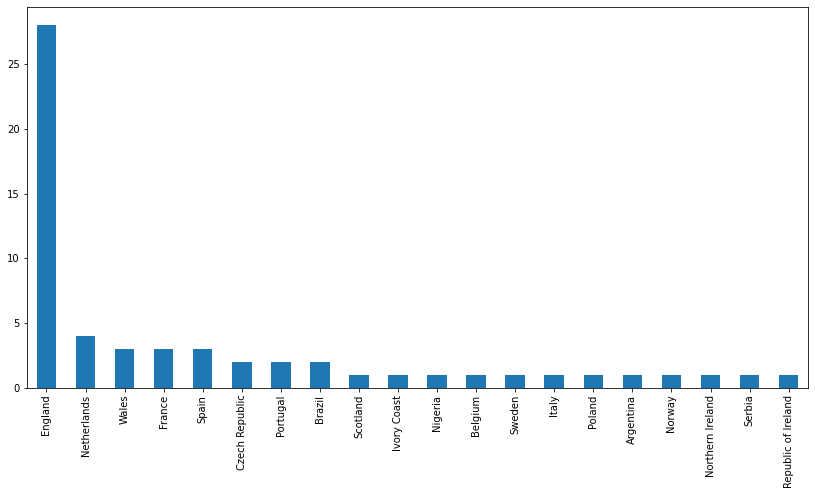

In [268]:
plot_countries_represented_by_club_player("Manchester United")

In [269]:
def compare_countries_represented_by_clubs(*club_list):
    stacked_panda = pd.DataFrame()
    
    for club in club_list:
        pd_player_list = get_player_by_club(club)
        pd_player_nationality_value_counts = pd_player_list["Nationality"].value_counts()
        stacked_panda = pd.concat([stacked_panda, pd_player_nationality_value_counts], axis=1)
        
    stacked_panda.columns = club_list
    stacked_panda = stacked_panda.sort_index(0)
    stacked_panda = stacked_panda.fillna(0)
    
    stacked_panda.plot.bar()
    plt.show()
    
    return stacked_panda

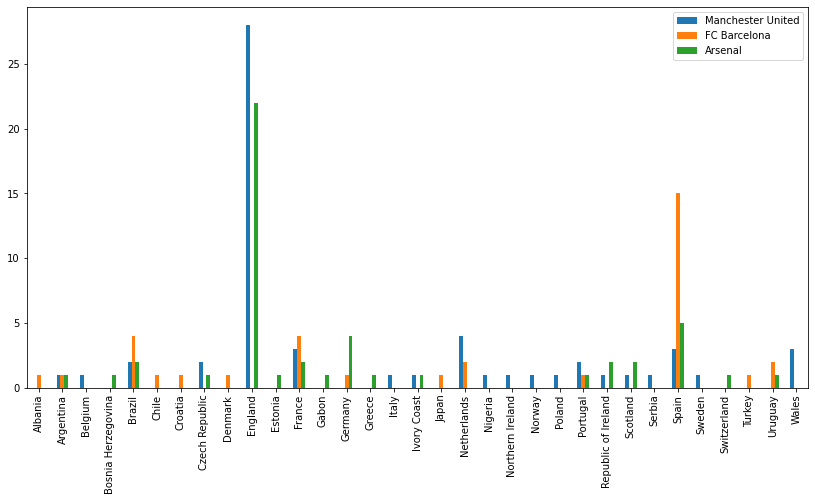

,Manchester United,FC Barcelona,Arsenal
Albania,0.0,1.0,0.0
Argentina,1.0,1.0,1.0
Belgium,1.0,0.0,0.0
Bosnia Herzegovina,0.0,0.0,1.0
Brazil,2.0,4.0,2.0
Chile,0.0,1.0,0.0
Croatia,0.0,1.0,0.0
Czech Republic,2.0,0.0,1.0
Denmark,0.0,1.0,0.0
England,28.0,0.0,22.0


In [270]:
compare_countries_represented_by_clubs("Manchester United", "FC Barcelona", "Arsenal")